In [1]:
import cv2 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
def catimageshow(imageTitle, image):
    imageVariable = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(4,2))
    plt.imshow(imageVariable)
    plt.title(imageTitle)
    plt.show()

In [4]:
def conv(image, kernel):
    imageH, imageW = image.shape[:2]
    kernelH, kernelW = kernel.shape[:2]
    
    padding = (kernelW-1) // 2 # specail padding rules
    
    iamge = cv2.copyMakeBorder(image, 
                              padding, padding,
                              padding, padding,
                              cv2.BORDER_REFLECT)
    
    outputmask = np.zeros((imageH, imageW), dtype = "float32" )# used zero to omit the overlap data
    
    
    for y in np.arange(padding, imageH+padding): # array Range
        for x in np.arange(padding, imageW+padding):
            #ROI --> Region of interest # select a particular portion
            roi = image [y- padding:y+padding+1,
                        x- padding:x+padding+1] # scaling
            k = (roi.dot(kernel)).sum()
            outputmask[y-padding, x-padding] = k
            
            
    outputmask = rescale_intensity (outputmask, in_range =(0,255)) # re scaling 
    # then we should to return in orginal image
    outputmask = (outputmask * 255 ).astype("uint8") # return in original image
                                   
    return outputmask
            

In [5]:
imageArgs = {"image": "../input/morphological-open/inputcat1.jpg"} 

In [6]:
imageSamllblur = np.ones((7,7),dtype ="float")*(1.0/(7*7))
# as all kernel range ,0.1, -1, ratio dimension should be same,
# datatype float, numerical scaling
# if you wany interger put double slash (//)
imageLargeblur = np.ones((21,21), dtype ="float")*(1.0/(21*21))

In [7]:
#This filter is used mainly to increase the brightness at edges and boundaries.
sharpen = np.array([[0, -1, 0],  # shrapen kernel
          [-1, 5, -1],
         [0, -1, 0]], dtype = "int")

In [8]:
image  = cv2.imread(imageArgs["image"])
grayimage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # color conversion

In [9]:
# print("Image information {}".format(image))
# print("Image information {}".format(grayimage))
print("Image information {}".format(image.shape))
print("Image information {}".format(grayimage.shape))

Image information (375, 500, 3)
Image information (375, 500)


In [10]:
convImage= conv(image, sharpen)
filterOnimage = cv2.filter2D(grayimage,-1,sharpen)

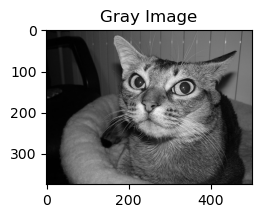

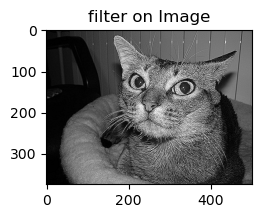

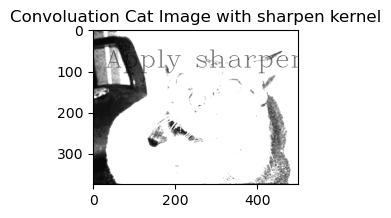

In [11]:
catimageshow("Gray Image", grayimage)
catimageshow("filter on Image", filterOnimage)
textonImage= "Apply sharpen"
imageCoor = (30,90)
cv2.putText(convImage,textonImage,imageCoor,fontFace =cv2.FONT_HERSHEY_COMPLEX
           ,fontScale = 2.0, color =(0,128,0))
catimageshow("Convoluation Cat Image with sharpen kernel",convImage)
# #catimageshow("Conv Image", convImage)

In [12]:
# The filter is applied to the image by convolving the filter kernel with each pixel in the image. For each pixel, the filter calculates the gradient 
#n the horizontal direction using the values in the filter kernel, and assigns the magnitude of the gradient to the output image at that pixel.
BottomSobel = np.array([[-1, -2, -1],  # BottomSobel kernel
          [0, 0, 0],
           [1, 2, 1]], dtype = "int")

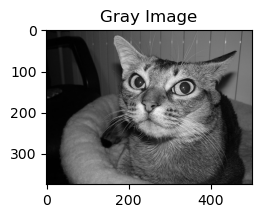

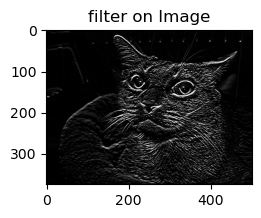

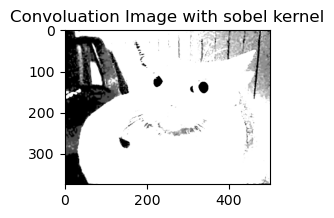

In [13]:
SobelconvImage= conv(image, BottomSobel)
filterOnimage = cv2.filter2D(grayimage,-1,BottomSobel)

catimageshow("Gray Image", grayimage)
catimageshow("filter on Image", filterOnimage)
catimageshow("Convoluation Image with sobel kernel",SobelconvImage)

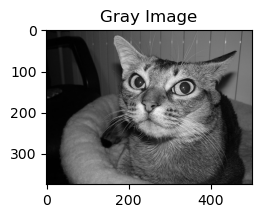

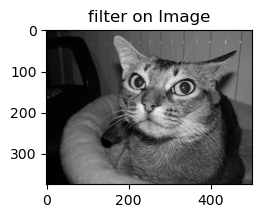

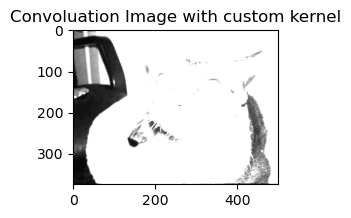

In [14]:
# Custiom Kernel is whatever you make it.
Custom = np.array([[-0.1, 0, 0],  # BottomSobel kernel
          [0, 1, 0],
           [0, 0, 0]], dtype = "int")
CustomconvImage= conv(image, Custom)
filterOnimage = cv2.filter2D(grayimage,-1,Custom)

catimageshow("Gray Image", grayimage)
catimageshow("filter on Image", filterOnimage)
catimageshow("Convoluation Image with custom kernel",CustomconvImage)

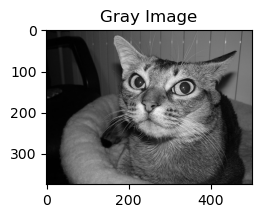

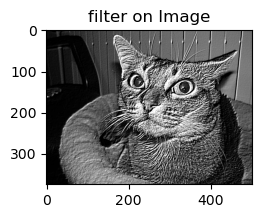

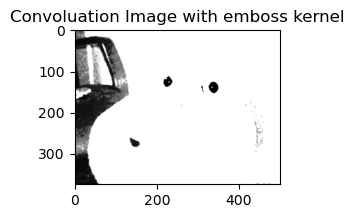

In [15]:
# Emboss Kernel is used to apply an embossing effect to an image.
emboss= np.array([[-2, -1, 0],  # BottomSobel kernel
          [-1, 1, 1],
           [0, 1, 2]], dtype = "int")
embossconvImage= conv(image, emboss)
filterOnimage = cv2.filter2D(grayimage,-1,emboss)

catimageshow("Gray Image", grayimage)
catimageshow("filter on Image", filterOnimage)
catimageshow("Convoluation Image with emboss kernel",embossconvImage)

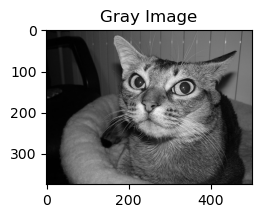

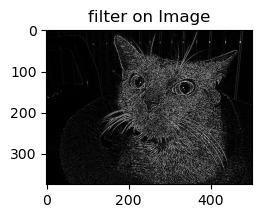

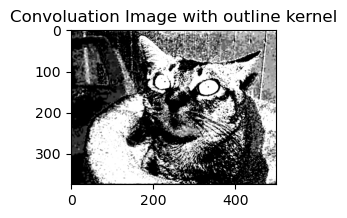

In [16]:
# Outline kernel is used to apply an outline or edge detection effect to an image. The outline effect highlights the edges of objects in the image, making them more visible.
outline= np.array([[-1, -1, -1],  # BottomSobel kernel
          [-1, 8, -1],
           [-1, -1, -1]], dtype = "int")
outlineconvImage= conv(image, outline)
filterOnimage = cv2.filter2D(grayimage,-1,outline)

catimageshow("Gray Image", grayimage)
catimageshow("filter on Image", filterOnimage)
catimageshow("Convoluation Image with outline kernel",outlineconvImage)

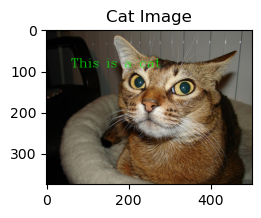

In [17]:
# image annotation with text
imageText = image.copy()
textonImage= "This is a cat"
imageCoor = (60,90)
cv2.putText(imageText,textonImage,imageCoor,fontFace =cv2.FONT_HERSHEY_COMPLEX
           ,fontScale = 1.0, color =(0,252,0))
catimageshow("Cat Image",imageText)

# image = cv2.cvtColor(imageText,cv2.COLOR_BGR2RGB)
# plt.subplot(111)
# plt.imshow(image)
# plt.title("Image of Cat")

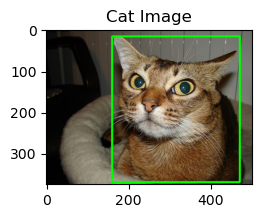

In [18]:
# image annotation with rectangle
imageText = image.copy()
textonImage= "This is a cat"
imageCoor1 = (160,15)
imageCoor2 = (470,370)
cv2.rectangle(imageText,imageCoor1,imageCoor2,color=(0,255,0), 
             thickness =3)
catimageshow("Cat Image",imageText)